In [31]:

import os

os.chdir('/home/nwong/chompsky/serial_chain/telephone-analysis-public')

import pandas as pd
import load_runs

from os.path import join, exists

import importlib

import matplotlib.pyplot as plt
import numpy as np

from new_models import prep_probs


## Load editTable information from Prep notebook

In [27]:
# Load the results of scoring per model

WORD_CHANGES_FOLDER = './intermediate_results/word_changes'
word_change_path = join(WORD_CHANGES_FOLDER, 'word_change_probs.csv')

all_changes_probs = prep_probs.load_word_changes(WORD_CHANGES_FOLDER)

In [46]:
!pip install seaborn

Traceback (most recent call last):
  File "/usr/local/bin/pip", line 11, in <module>
    load_entry_point('pip==19.1.1', 'console_scripts', 'pip')()
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 561, in load_entry_point
    return get_distribution(dist).load_entry_point(group, name)
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 2649, in load_entry_point
    return ep.load()
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 2303, in load
    return self.resolve()
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 2309, in resolve
    module = __import__(self.module_name, fromlist=['__name__'], level=0)
  File "/usr/local/lib/python2.7/dist-packages/pip-19.1.1-py2.7.egg/pip/_internal/__init__.py", line 40, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python2.7/dist-packages/pip-19.1.1-py2.7.egg/pip/_internal/cli

In [56]:
import seaborn

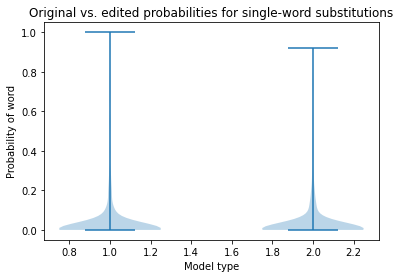

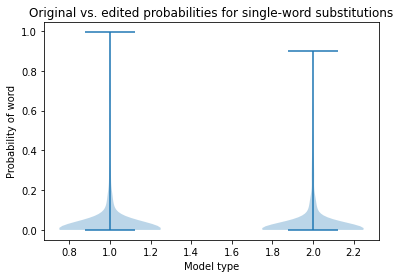

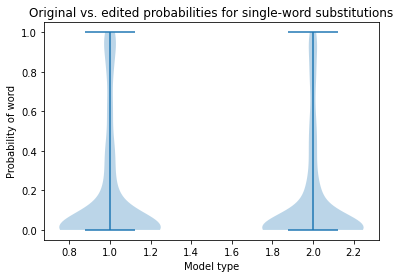

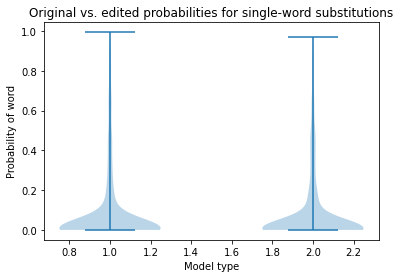

In [55]:
word_change_prob_df.head()

def plot_change_violin(data):
    """
    list_df = a list of word_change_probs df, one per model type
    """
    
    plt.title('Original vs. edited probabilities for single-word substitutions')
    plt.xlabel('Model type')
    plt.ylabel('Probability of word')

    plt.violinplot(data)
    plt.show()
    


# 5/31: https://stackoverflow.com/questions/25050141/how-to-filter-in-nan-pandas
def filter_nan_df(df):
    df = df[~(df['orig_prob'].isnull() | df['edited_prob'].isnull())]
    return df

for model_name, raw_df in all_changes_probs.items():
    filtered_df = filter_nan_df(raw_df) # Why didn't this filter anything? 
    
    data_unwrapped = [filtered_df['orig_prob'], filtered_df['edited_prob']] 
    plot_change_violin(data_unwrapped)


## Run scoring per model